## Installation instructions

```bash
pip install music21
```

After installing music21, run the following

```python
import music21
music21.configure.run()
```

Follow the steps to configure music21

# Milestone 2
## 1. Gathering the data

As mentioned in the previous Milestone, answering our research questions related to the modal organization of Chinese Folk Songs (hereafter CFS) across China requires a dataset of CFS with the following properties:
1. The CFS must come from diverse regions of China
2. The origin of each song must be annotated
3. If possible, the tonic of each song should be annotated

By simply querying these information on a search engine, we found the [Essen Folksong Database](http://www.esac-data.org/). This database contains more than 20'000 scores of folksongs, of which approximately 2250 come from China. This dataset is particularly interesting as it contains the regional information required to answer our research questions. Indeed, not only are the Chinese scores classified into 4 distinct geographical regions (Han, Natmin, Shanxi, Xinhua), which shows diversity in their origins, but each piece also contains a more precise provenance (the province or city). Moreover, each song is annotated with its tonic, though it is unclear whether the annotation is manual or if it has been infered by a software *(is it ?)*. Therefore, as this dataset fullfils the three criteria above, it is well suited for our project. We can easily download all the relevant data of the Essen Collection from the [KernScore database](https://kern.humdrum.org/cgi-bin/browse?l=essen/asia/china) as a ZIP file. 



*Questions not answered yet :*
- What aspects of the researched phenomena does the data (not) represent?
- What is the maximum available amount in theory (in the case of incomplete data acquisition)?
- If working on partial data, how representative is your sample for the full dataset?


## 2. Data format

Originally, the Essen Folksong Database is in a particular format that is inspired by the *Jianpu* notation. While it may have been interesting to work with this format to analyze CFS, a translation of this database has been made in \*\*kern format which we will use for simplicity reasons. In \*\*kern files, the information is encoded as... *(here answer : How is the information that the dataset represents encoded in this format?)*

\*\*kern files can be read in Python using the *music21* module, which can be easily installed via *pip*. We can first load the module:

In [1]:
from music21 import *
import glob
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
plt.rcParams["figure.figsize"] = (20,5)



#NOTE TO RAVI AND ZIJUN : This is the MuseCore path on my Computer, you will need to download MuseScore and to specify the path yourself
environment.set('musescoreDirectPNGPath', 'C:\\Program Files\\MuseScore 3\\bin\\MuseScore3.exe')

Let's load one song from the regional category *Han* and display it

In [ ]:
score = converter.parse("data/han/han0111.krn")
score.show()

HorizontalBarFirst, we are interested in the origin of the song. Apart from the regional category (*Han*), the more precise origin of the song is contained in a `GlobalReference` with the code `ARE`. One way to access it is to iterate over all the elements and only print it if it is an element of that type with the correct code

In [ ]:
for element in score:
    if type(element) is humdrum.spineParser.GlobalReference and element.code == "ARE":
        print(element.value)

As our analysis will rely on scale degrees, we will need to access the pitches and their durations as well as the tonic. The following snippet allows us to access all the notes of the first measure and the tonic of the piece.

In [ ]:
for part in score.parts:
    for element in part.measure(0):
        if type(element) is key.Key:
            print(f"The tonic is : {element.tonic}")
        if type(element) is note.Note:
            print(element.pitch, element.duration.quarterLength)

To get a list of `pitches`.

In [ ]:
for pitch in score.pitches:
    print(pitch)

We have a method to transpose the piece called `transpose`.

Transpose all specified classes in the Stream by the user-provided value. If the value is an integer, the transposition is treated in half steps. If the value is a string, any Interval string specification can be provided.

In [ ]:
value=0
score.transpose(value=value)

Some plots related to the piece. These plots are mostly not useful for us. However, made them in procees of exploring.

In [ ]:
score.plot('histogram', 'pitch')

In [ ]:
score.plot('histogram', 'pitchclass')

### Questions

1. What format(s) does the raw data come in?
2. How is the information that the dataset represents encoded in this format?
3. Load your dataset and show examples of how you access the information that you are interested in.
4. Give an overview of your dataset by plotting some basic statistics of the relevant features and/or metadata.


#### 2.1

The data is made up of four folders, each one for one of the four geographical regions. Each folder contains the music pieces belonging to that region. The raw data (each music pience) comes as a Kern file. They are in the [Humdrum file format](https://wiki.ccarh.org/images/d/dc/Humdrum_file_format.pdf).

#### 2.2

The Humdrum format provides notes and duration in each piece along with some metadata. The metadata contained in the kern file and useful for the project is described below. (The meta data is stored as a global comment in Humdrum format at the top of the file)

|Code in Kern File|Explanation|
------------------|-----------|
|OTL|Title|
|Ethnic Group|Ethnic Group|
|ARE|Geogrpahical Region|

#### 2.3

What we did above (need reorganising)

#### 2.4 

First, we will get some basic stats

We have already created a dataframe combining the required elements, try to load it. If it is not available, then run the remaining cells

In [11]:
#try to load the data frame
regions = ["han", "natmin", "shanxi", "xinhua"]

CFS_full = pd.read_csv("./data/dataframes/cfs_full.csv", converters={'pitches': eval,'pitchclasses': eval,'pitches_transposed': eval,'pitchclasses_transposed': eval,'top5_after_transpose': eval})
CFS_full

,region,title,location,tonic,pitches,num_notes,pitchclasses,num_pitchclasses,tonic_transposed,pitches_transposed,pitchclasses_transposed,top5_after_transpose
0,han,Renmin gongshe shizai hao,"Asia, China, Shanxi, Zizhou",D,"[D5, A4, C5, D5, D5, A4, C5, D5, G5, C5, A4, G...",64,"[D, A, C, G, E, F#]",6,C,"[C5, G4, B-4, C5, C5, G4, B-4, C5, F5, B-4, G4...","[C, G, B-, F, D, E]","[C, B-, F, G, D]"
1,han,Zanmen de ling xiu Mao Zedong,"Asia, China, Shanxi Nordwesten",C,"[C5, C5, F5, C5, B-4, G4, C5, E-4, F4, G4, C5,...",57,"[C, F, B-, G, E-, D, A]",7,C,"[C5, C5, F5, C5, B-4, G4, C5, E-4, F4, G4, C5,...","[C, F, B-, G, E-, D, A]","[C, G, F, E-, D]"
2,han,Tian xin shun,"Asia, China, Shanxi Yanchang",D,"[D5, A4, D5, D5, A4, D5, A4, D5, G4, E4, D4, D...",24,"[D, A, G, E, B]",5,C,"[C5, G4, C5, C5, G4, C5, G4, C5, F4, D4, C4, C...","[C, G, F, D, A]","[C, G, F, D, A]"
3,han,Liu zhi dan,"Asia, China, Shanxi Shanbei",B-,"[E-5, C5, B-4, A-4, B-4, E-4, F4, E-5, C5, B-4...",41,"[E-, C, B-, A-, F]",5,C,"[F4, D4, C4, B-3, C4, F3, G3, F4, D4, C4, B-3,...","[F, D, C, B-, G]","[C, F, G, B-, D]"
4,han,Zanmen de hongjun shi li zhong,"Asia, China, Shanxi Shanbei",E,"[E5, E4, A4, G4, A4, B4, E5, D5, E5, B4, E5, E...",24,"[E, A, G, B, D]",5,C,"[C5, C4, F4, E-4, F4, G4, C5, B-4, C5, G4, C5,...","[C, F, E-, G, B-]","[C, G, F, B-, E-]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2236,xinhua,Moli hua,"Asia, China, Jiangsu",A,"[F#4, E4, F#4, A4, B4, A4, D5, B4, A4, F#4, A4...",174,"[F#, E, A, B, D]",5,C,"[A3, G3, A3, C4, D4, C4, F4, D4, C4, A3, C4, D...","[A, G, C, D, F]","[C, F, G, D, A]"
2237,xinhua,Yitang qingshui yitang lian,"Hunan, Hengshan",G#,"[C#5, E5, C#5, C#6, E6, B5, B5, G#5, C#6, B5, ...",90,"[C#, E, B, G#, F#]",5,C,"[F4, A-4, F4, F5, A-5, E-5, E-5, C5, F5, E-5, ...","[F, A-, E-, C, B-]","[C, B-, F, E-, A-]"
2238,xinhua,Ta4i ya2ng chu1 la2i xi3 ya2ng ya2ng Auf geht ...,"Asia, Ostasien, China, Sichuan",E,"[E4, F#4, E4, D4, E4, F#4, D4, E4, F#4, E4, E4...",30,"[E, F#, D, B, A]",5,C,"[C4, D4, C4, B-3, C4, D4, B-3, C4, D4, C4, C4,...","[C, D, B-, G, F]","[C, B-, G, F, D]"
2239,xinhua,Moli hua,"Asia, China, Jiangsu",A,"[F#4, E4, F#4, A4, B4, A4, D5, B4, A4, F#4, A4...",174,"[F#, E, A, B, D]",5,C,"[A3, G3, A3, C4, D4, C4, F4, D4, C4, A3, C4, D...","[A, G, C, D, F]","[C, F, G, D, A]"


if the dataframe does not load, then run the next few cells (untill where the dataframe is written to a file).

In [ ]:
# load the scores of each folder into a list

In [ ]:
def load_files(path):
    pieces = {"scores": [], "failed_scores": [], "total": 0, "failed": 0}
    for file in tqdm(glob.glob(path+"/*.krn")):
        pieces["total"] += 1
        try:
            pieces["scores"].append(converter.parse(file))
        except:
            print(file)
            pieces["failed"] += 1 
            pieces["failed_scores"].append(converter.parse(file))
    return pieces

In [ ]:
music_data = {}

for gloc in regions
    music_data[gloc] = load_files("./data/"+gloc)

In [ ]:
def get_tonic(score):
    try:
        note_scores = dict()
        for part in score.parts:
            for measure in part:
                if type(measure) is not stream.Measure:
                    continue
                for note_ in measure:
                    if type(note_) is not note.Note:
                        continue
                    if note_.name in note_scores.keys():
                        note_scores[note_.name] += note_.duration.quarterLength * note_.beatStrength
                    else:
                        note_scores[note_.name] = note_.duration.quarterLength * note_.beatStrength
#         tonic = [k for k, v in sorted(note_scores.items(), key=lambda item: item[1], reverse=True)][0]
        tonic = max(note_scores, key=note_scores.get)
    except:
        tonic = None
    pitchclasses = list(note_scores.keys())
    top5 = sorted(note_scores, key=note_scores.get, reverse=True)[:5]
    return tonic, pitchclasses, top5

In [ ]:
# create a dataframe
CFS_list = []

for gloc in tqdm(music_data):
    for score in music_data[gloc]["scores"]:
        title = score.metadata.title
        num_notes = len(score.pitches)
        for element in score:
            if type(element) is humdrum.spineParser.GlobalReference and element.code == "ARE":
                location = element.value
        tonic, pitchclasses, _ = get_tonic(score)
        num_pitchclass = len(pitchclasses)
        pitches = [str(pitch) for pitch in score.pitches]
        
        
        # transposing
        i = interval.Interval(pitch.Pitch(tonic), pitch.Pitch("C")).semitones
#         i = base_pitch.pitch.diatonicNoteNum - note.Note(tonic).pitch.diatonicNoteNum
        scoreNew = score.transpose(i)
        tonic_transposed, pitchclasses_transposed, top5 = get_tonic(scoreNew)
        pitches_transposed = [str(pitch) for pitch in scoreNew.pitches]
        
        CFS_list.append([gloc, title, location, tonic, pitches, num_notes, pitchclasses, num_pitchclass, tonic_transposed, pitches_transposed, pitchclasses_transposed, top5])

In [ ]:
CFS_full = pd.DataFrame(CFS_list, columns=["region", "title", "location", "tonic", "pitches", "num_notes", "pitchclasses", "num_pitchclasses","tonic_transposed", "pitches_transposed", "pitchclasses_transposed", "top5_after_transpose"])
CFS_full

In [ ]:
CFS_full.to_csv("./data/dataframes/cfs_full.csv", index=False)

### Stats Plotting

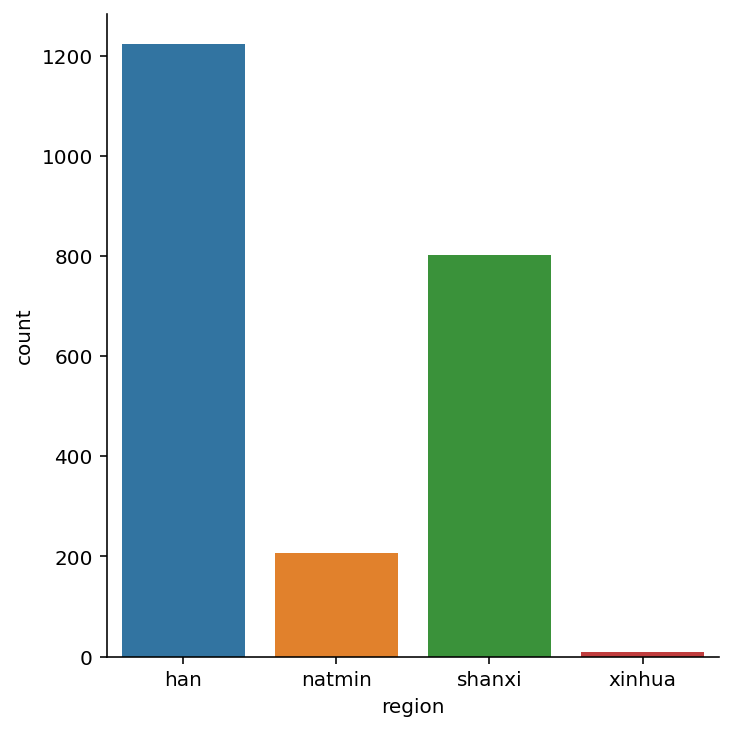

In [3]:
sns.catplot(x="region", kind="count", data=CFS_full)

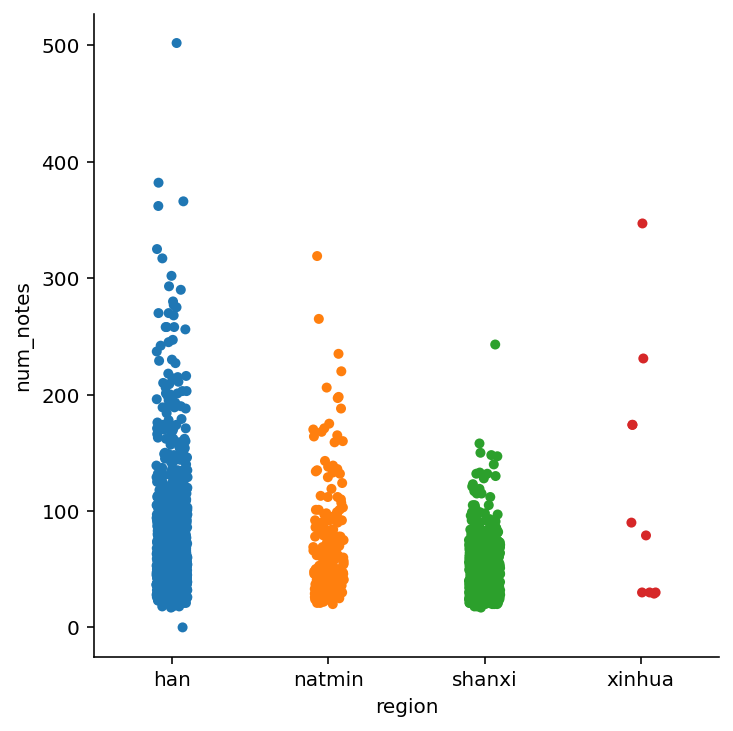

In [4]:
sns.catplot(x="region", y="num_notes", data=CFS_full)

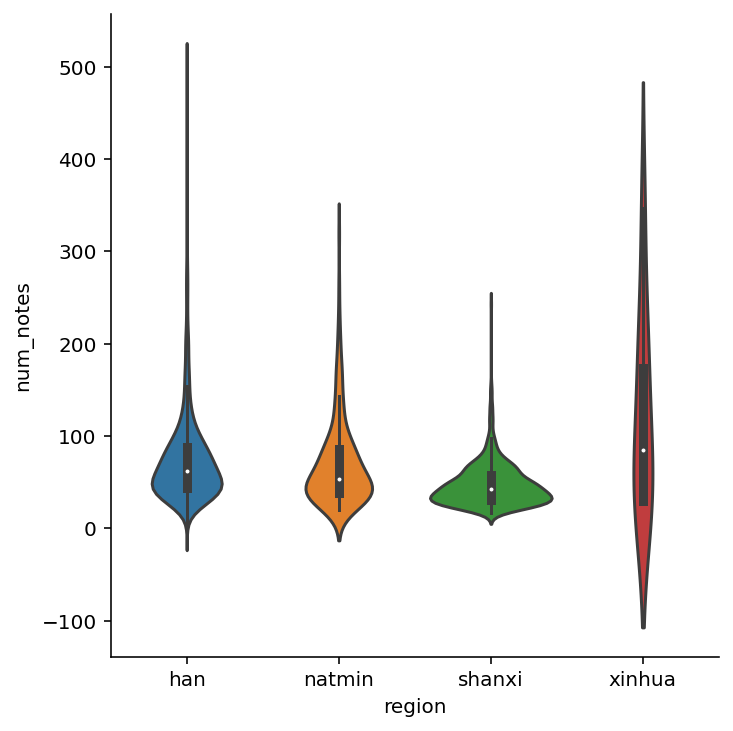

In [5]:
sns.catplot(x="region", y="num_notes", data=CFS_full, kind="violin")

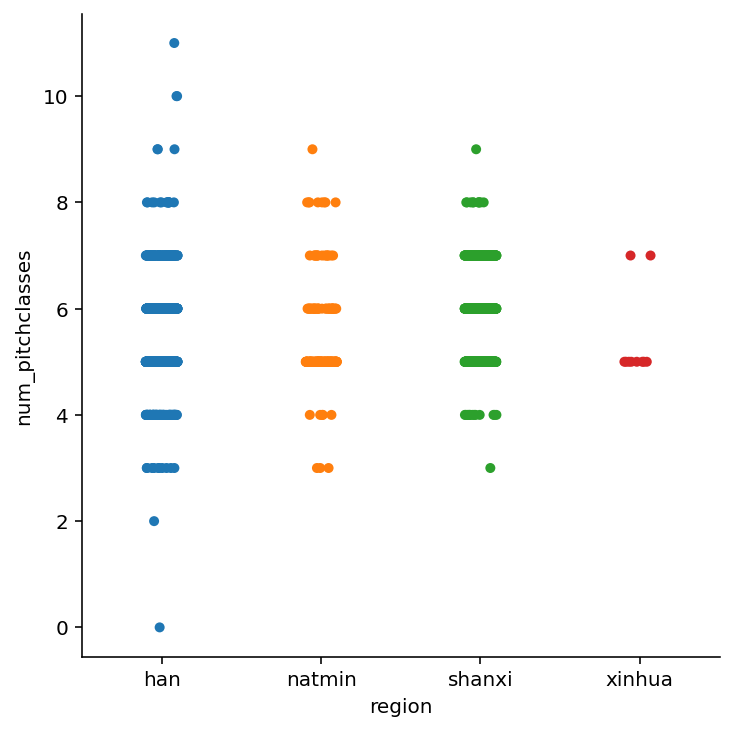

In [6]:
sns.catplot(x="region", y="num_pitchclasses", data=CFS_full)

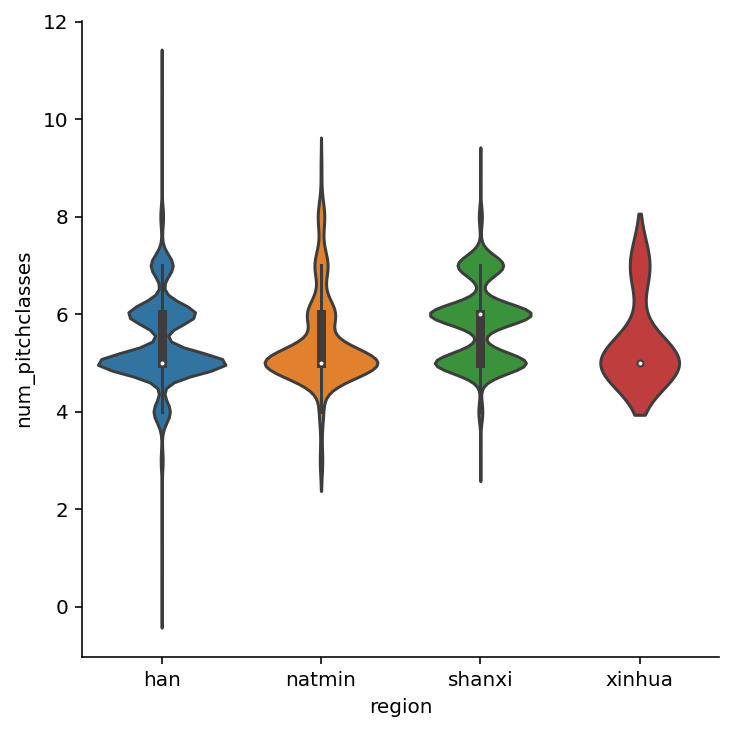

In [7]:
sns.catplot(x="region", y="num_pitchclasses", data=CFS_full, kind="violin")

### Pitch statistics

This could be part 3 in the M2.

In [12]:
region_pitch_stat = {}
region_pitchclass_stat = {}
region_pitch_transposed_stat = {}
region_pitchclass_transposed_stat = {}

for gloc in regions:
    
    region_df = CFS_full[CFS_full["region"]==gloc]
    region_pitch_stat[gloc] = sum(region_df["pitches"].tolist(), [])
    region_pitchclass_stat[gloc] = sum(region_df["pitchclasses"].tolist(), [])
    region_pitch_transposed_stat[gloc] = sum(region_df["pitches_transposed"].tolist(), [])
    region_pitchclass_transposed_stat[gloc] = sum(region_df["pitchclasses_transposed"].tolist(), [])

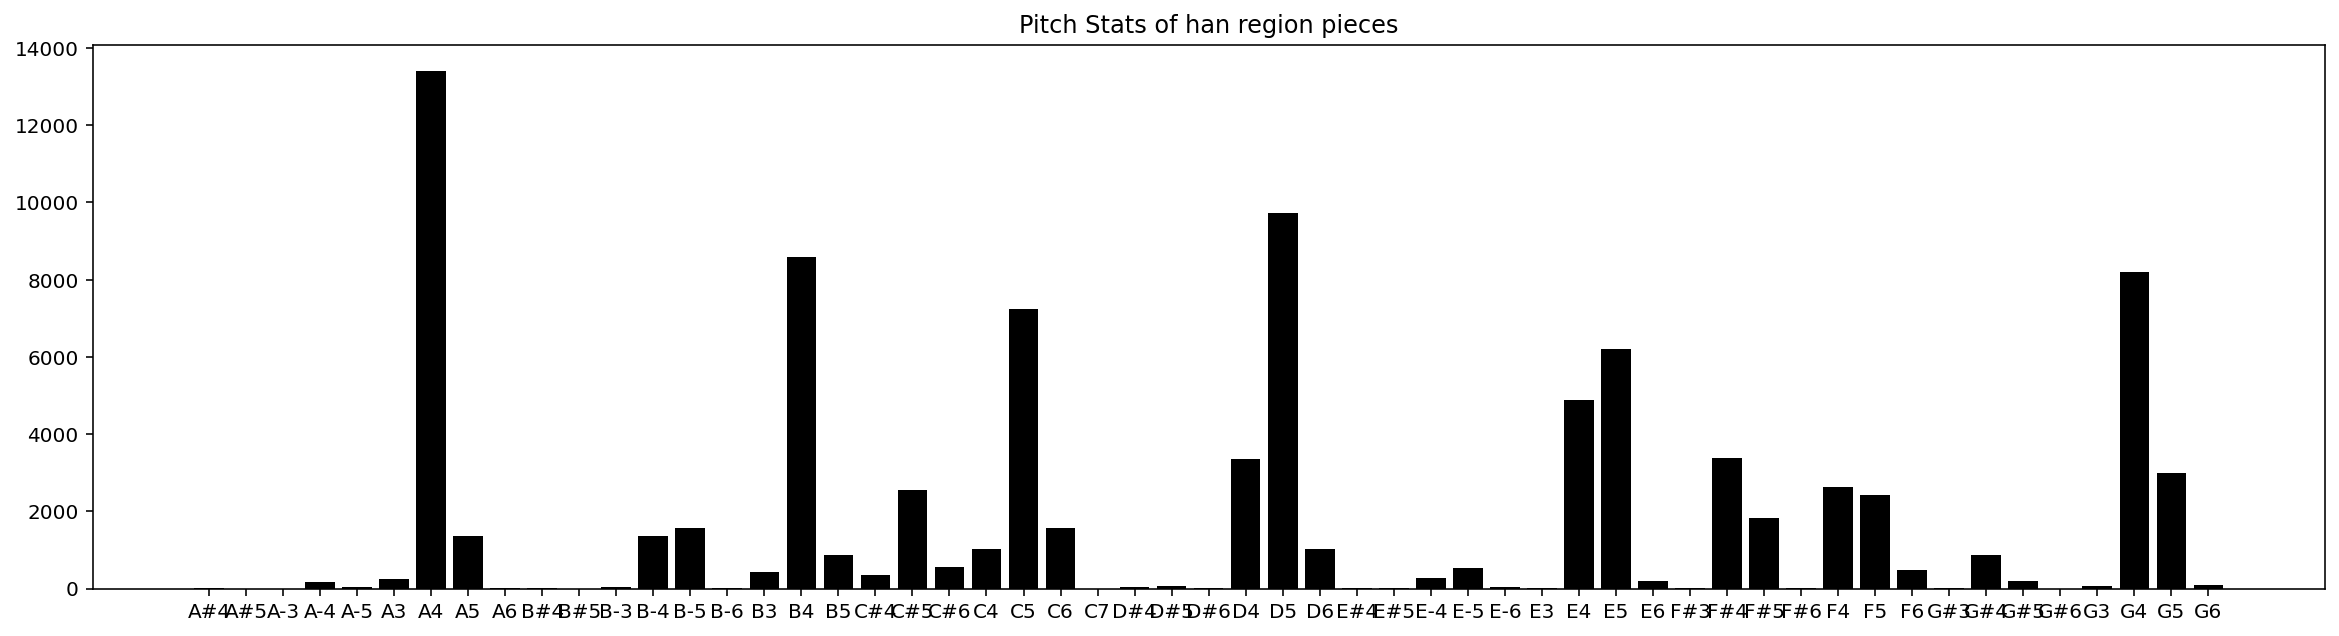

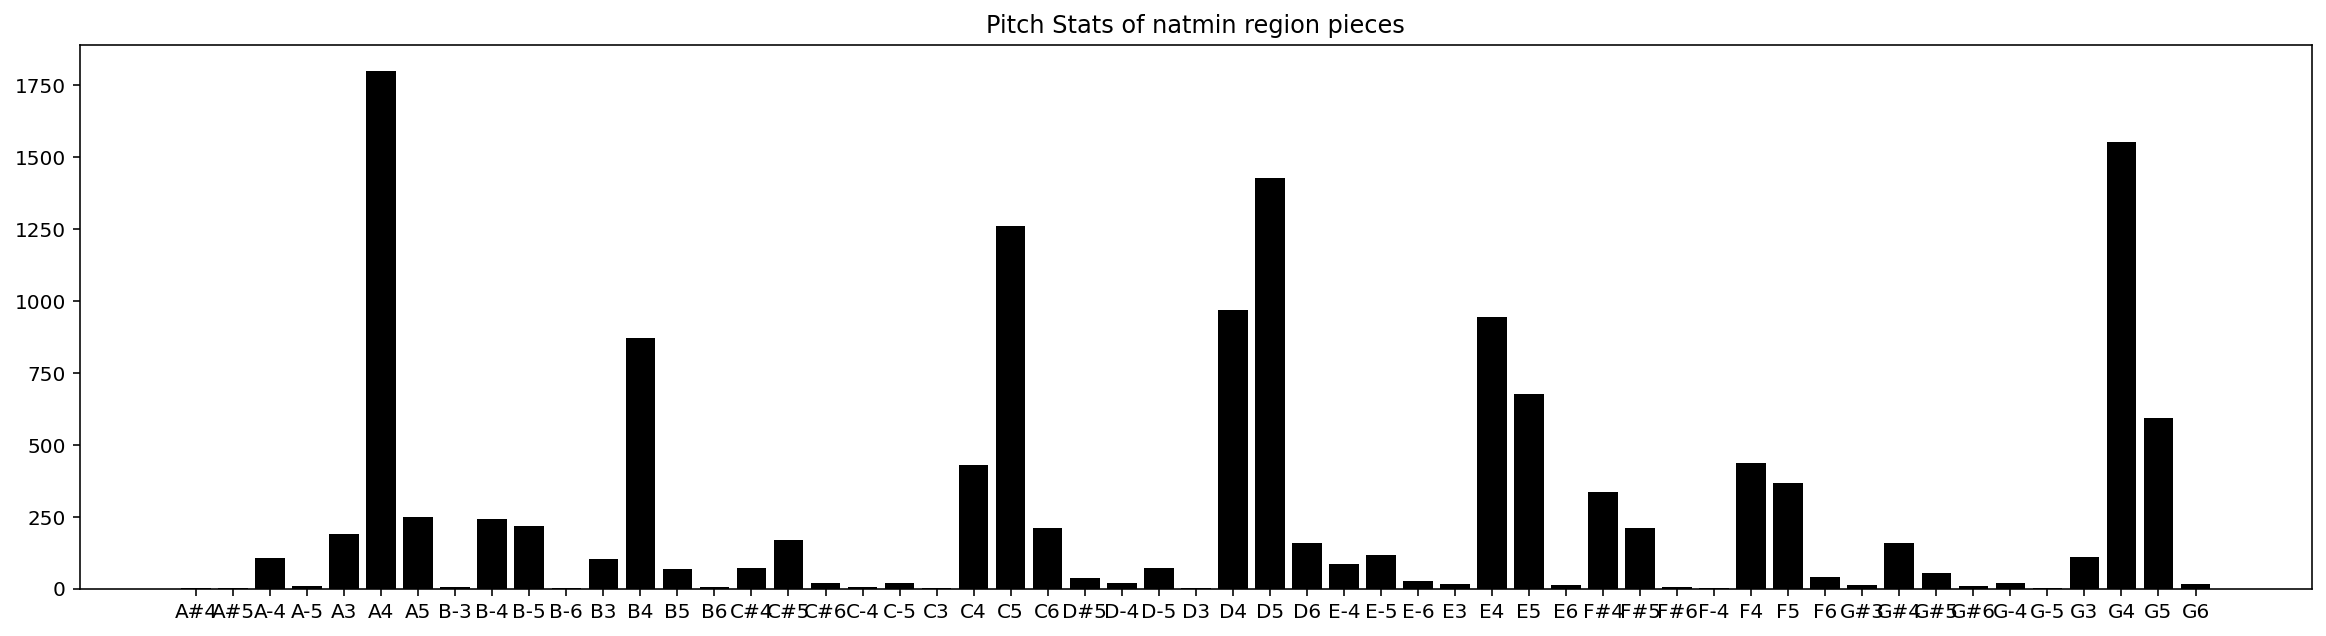

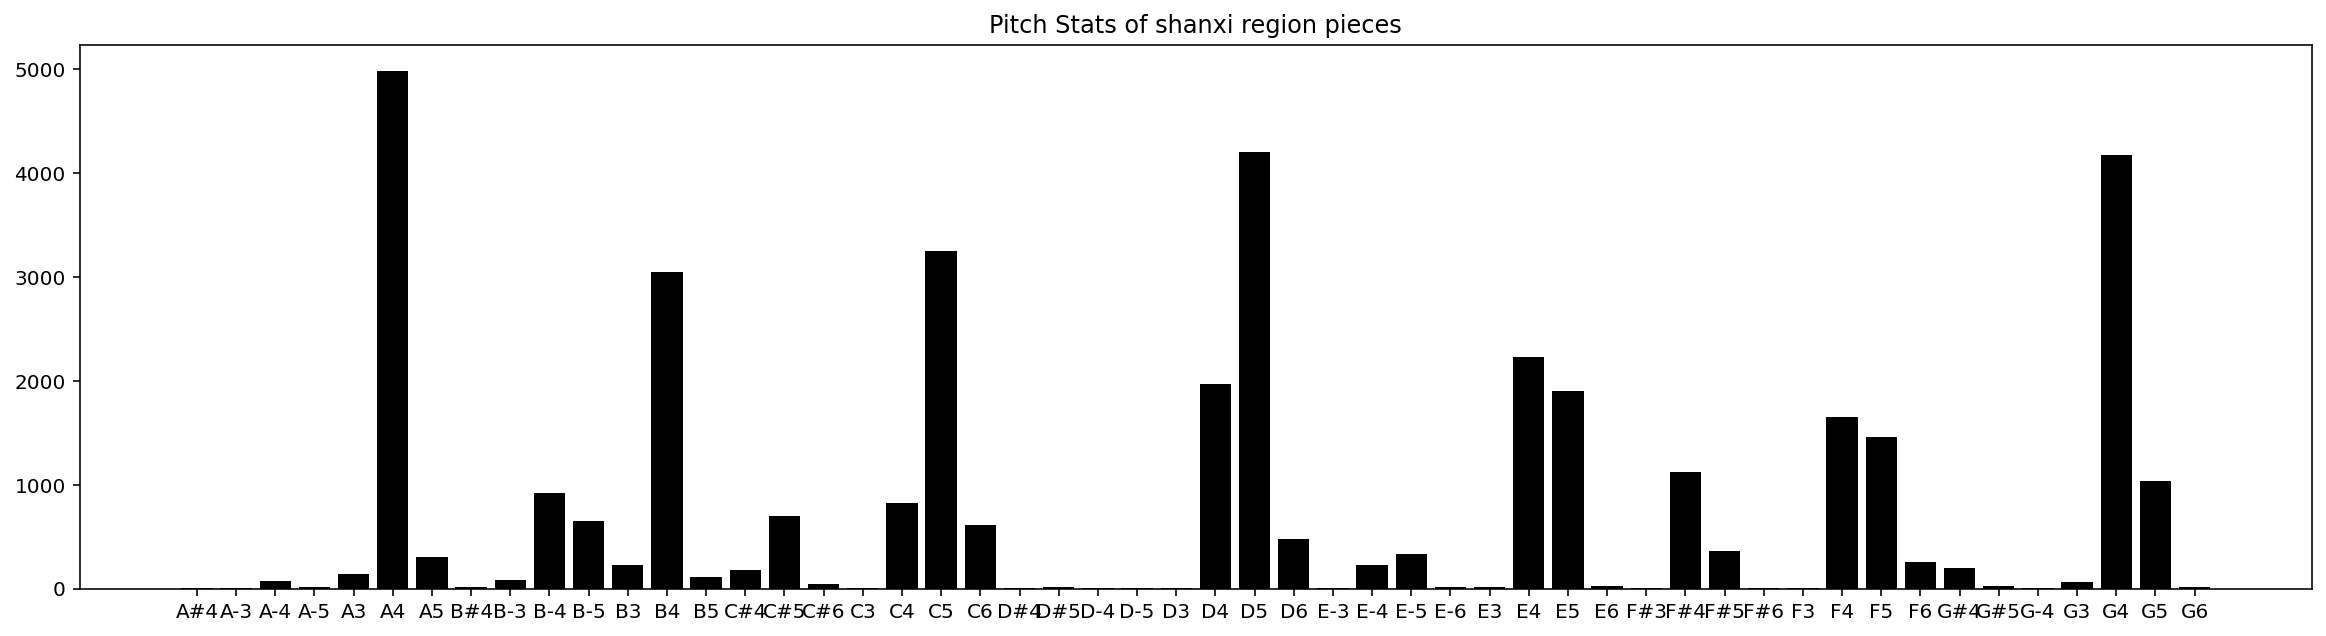

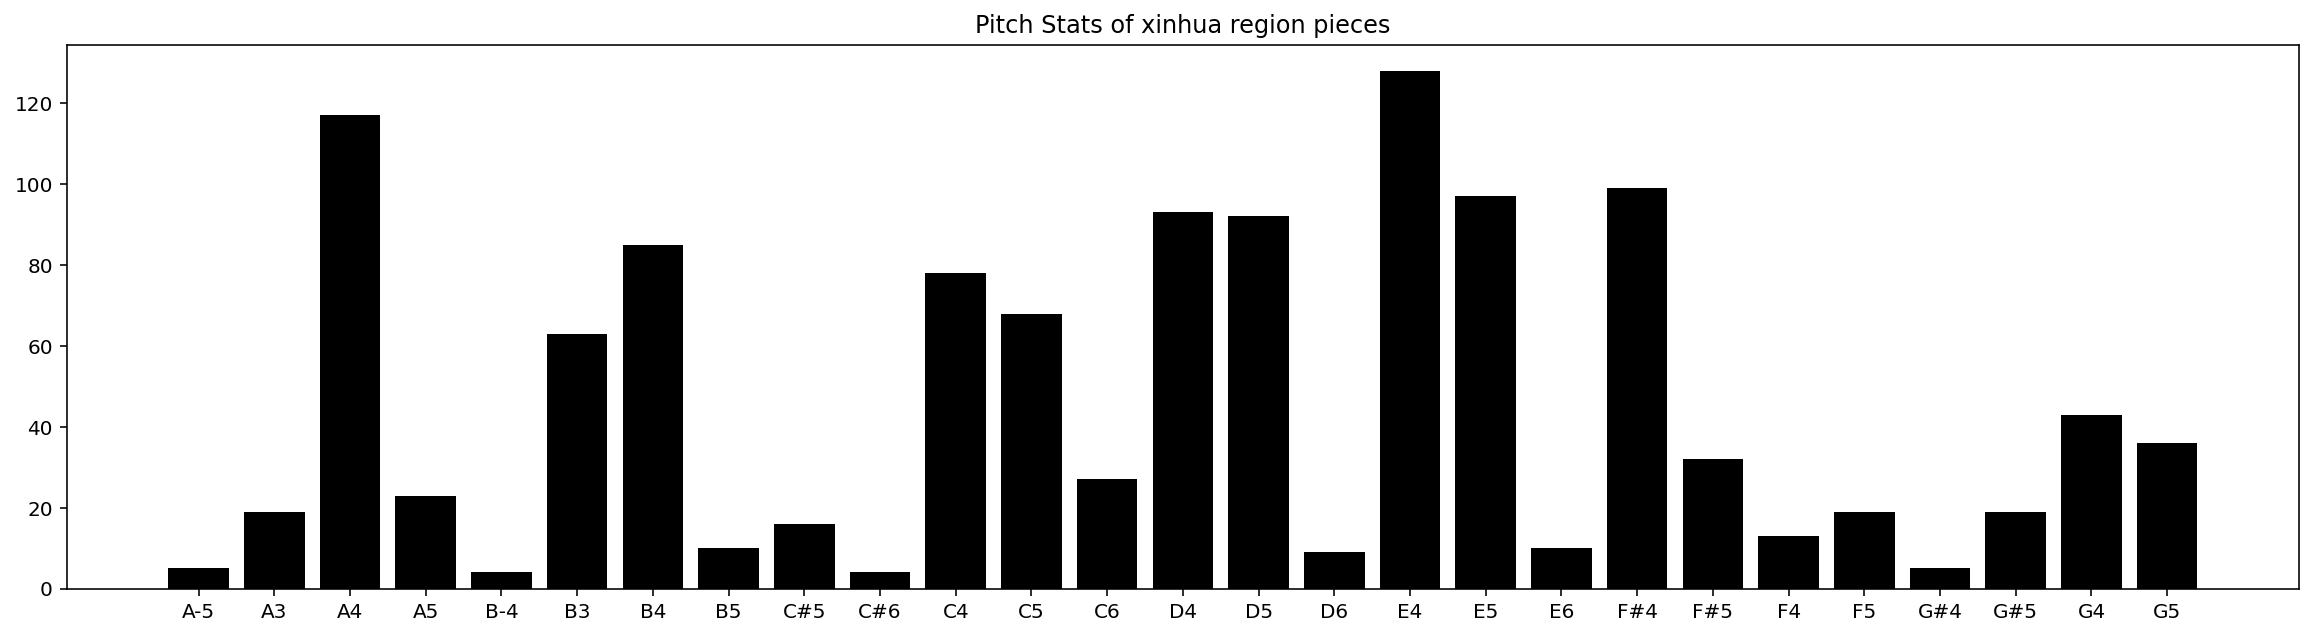

In [13]:
region_pitch_counts = {}
for gloc in region_pitch_stat:
    region_pitch_counts[gloc] = sorted(Counter(region_pitch_stat[gloc]).items(), key=lambda pair: pair[0])
    x, y = zip(*region_pitch_counts[gloc])
    plt.bar(x, y, color='black')
    plt.title("Pitch Stats of {} region pieces".format(gloc))
    plt.show()

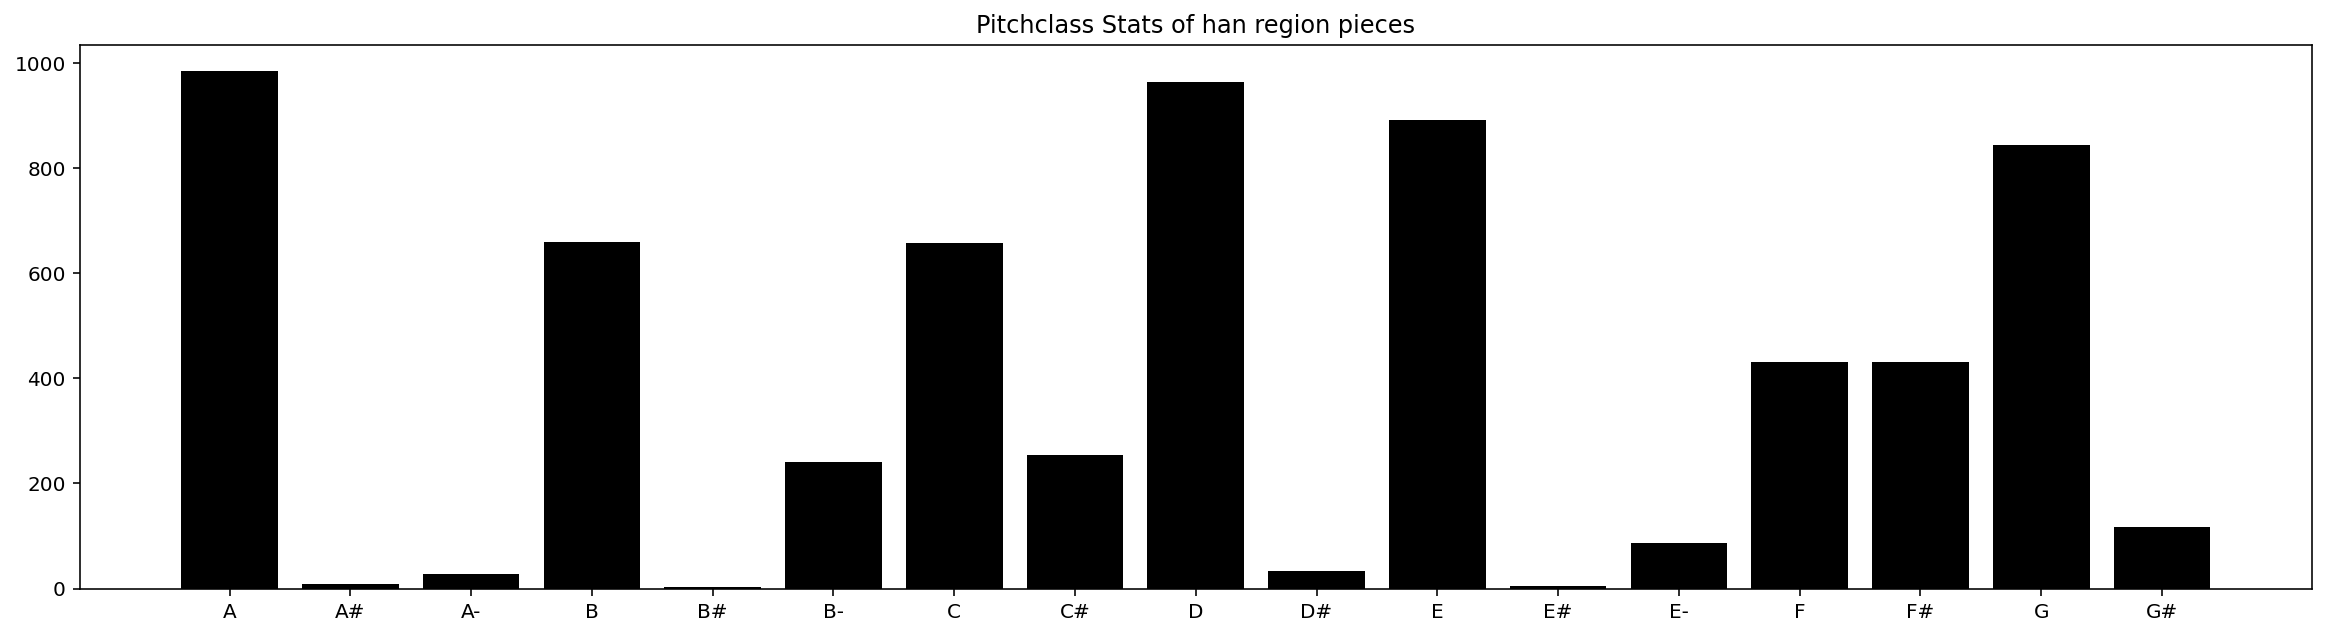

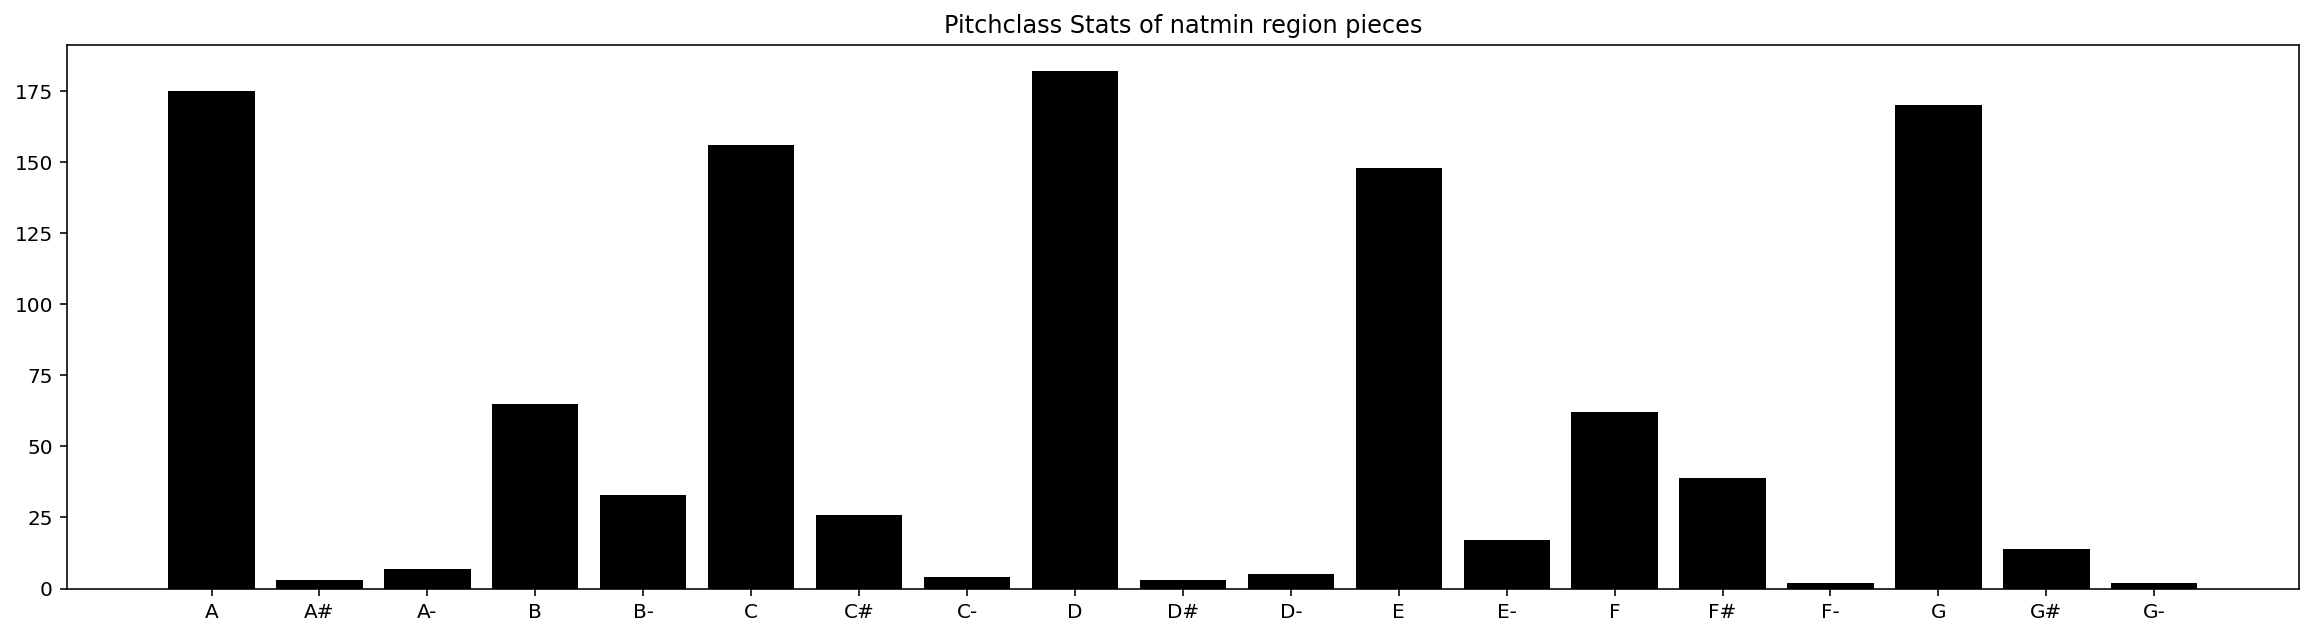

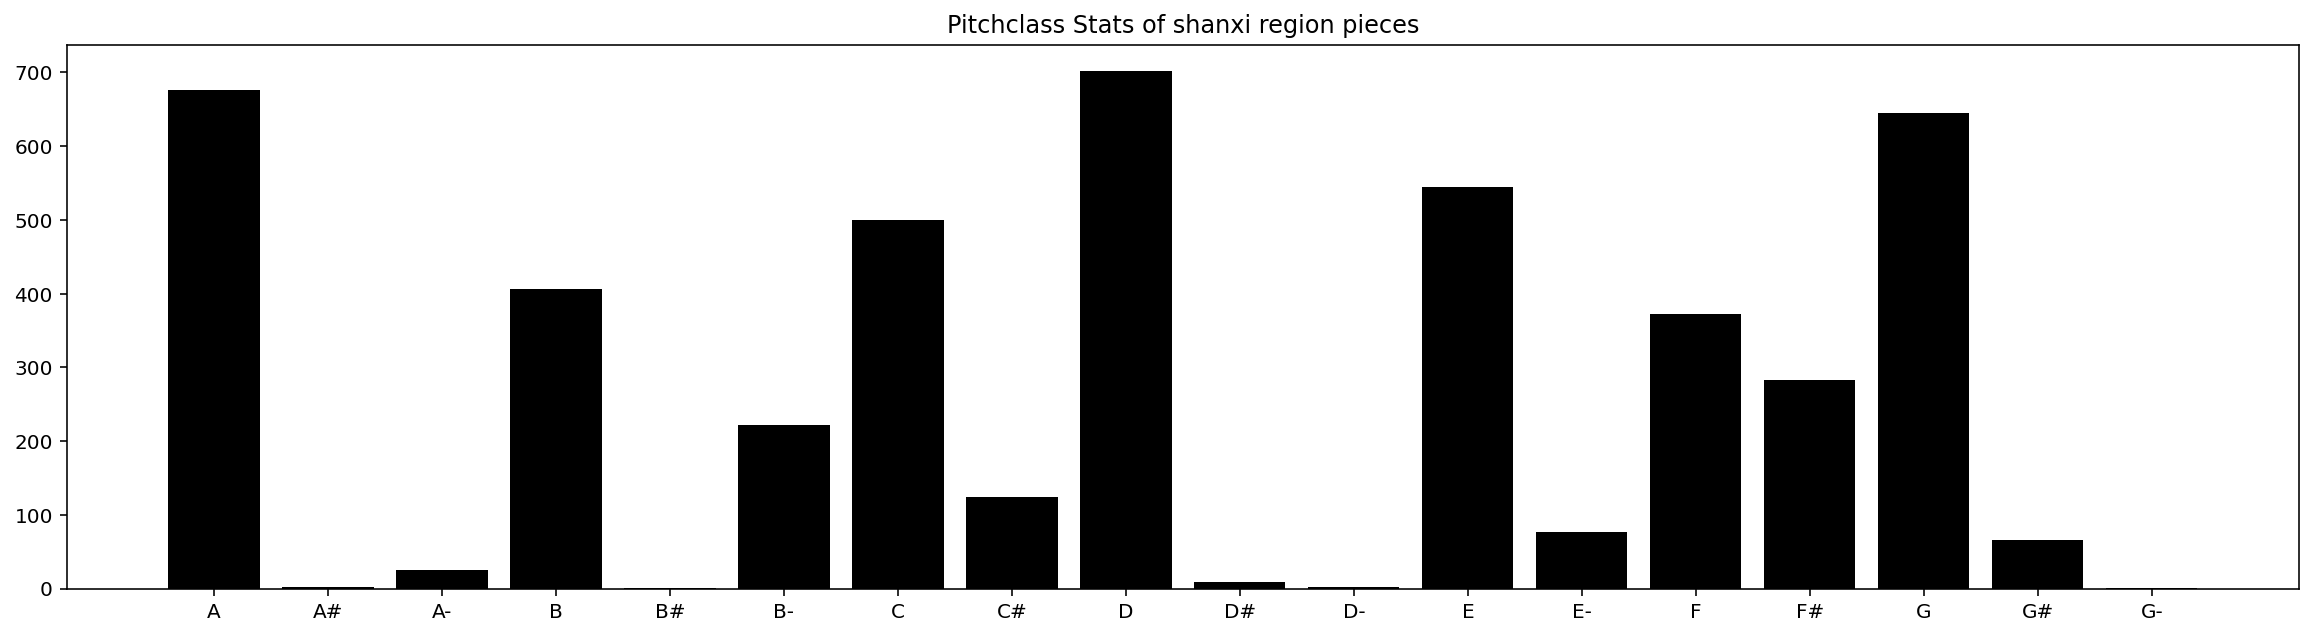

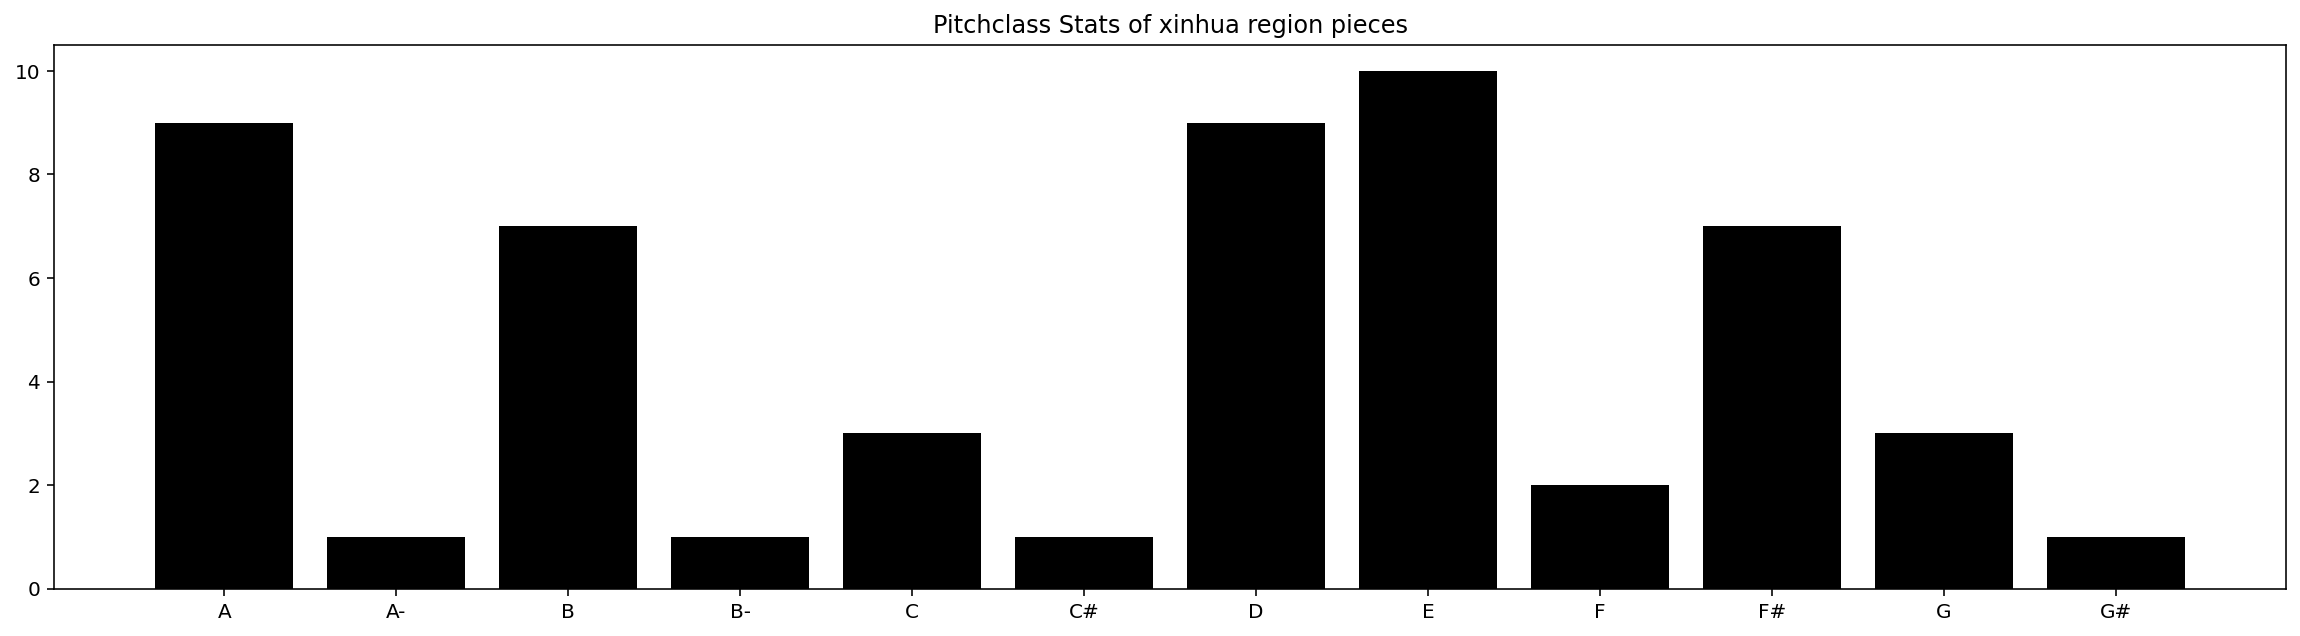

In [14]:
region_pitchclass_counts = {}
for gloc in region_pitchclass_stat:
    region_pitchclass_counts[gloc] = sorted(Counter(region_pitchclass_stat[gloc]).items(), key=lambda pair: pair[0])
    x, y = zip(*region_pitchclass_counts[gloc])
    plt.bar(x, y, color='black')
    plt.title("Pitchclass Stats of {} region pieces".format(gloc))
    plt.show()

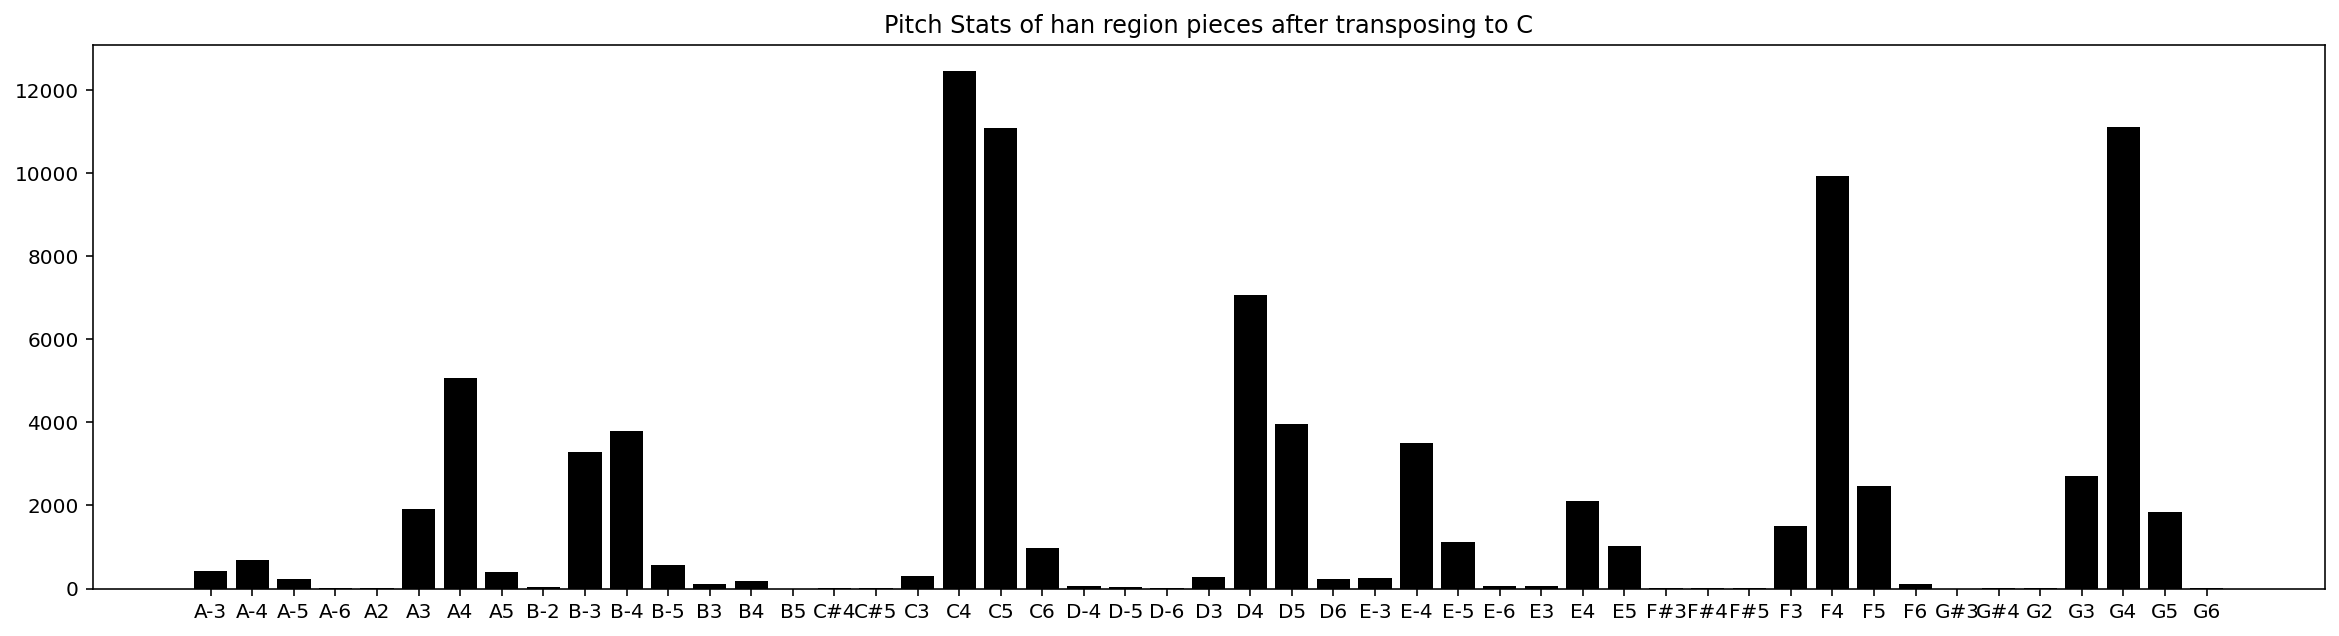

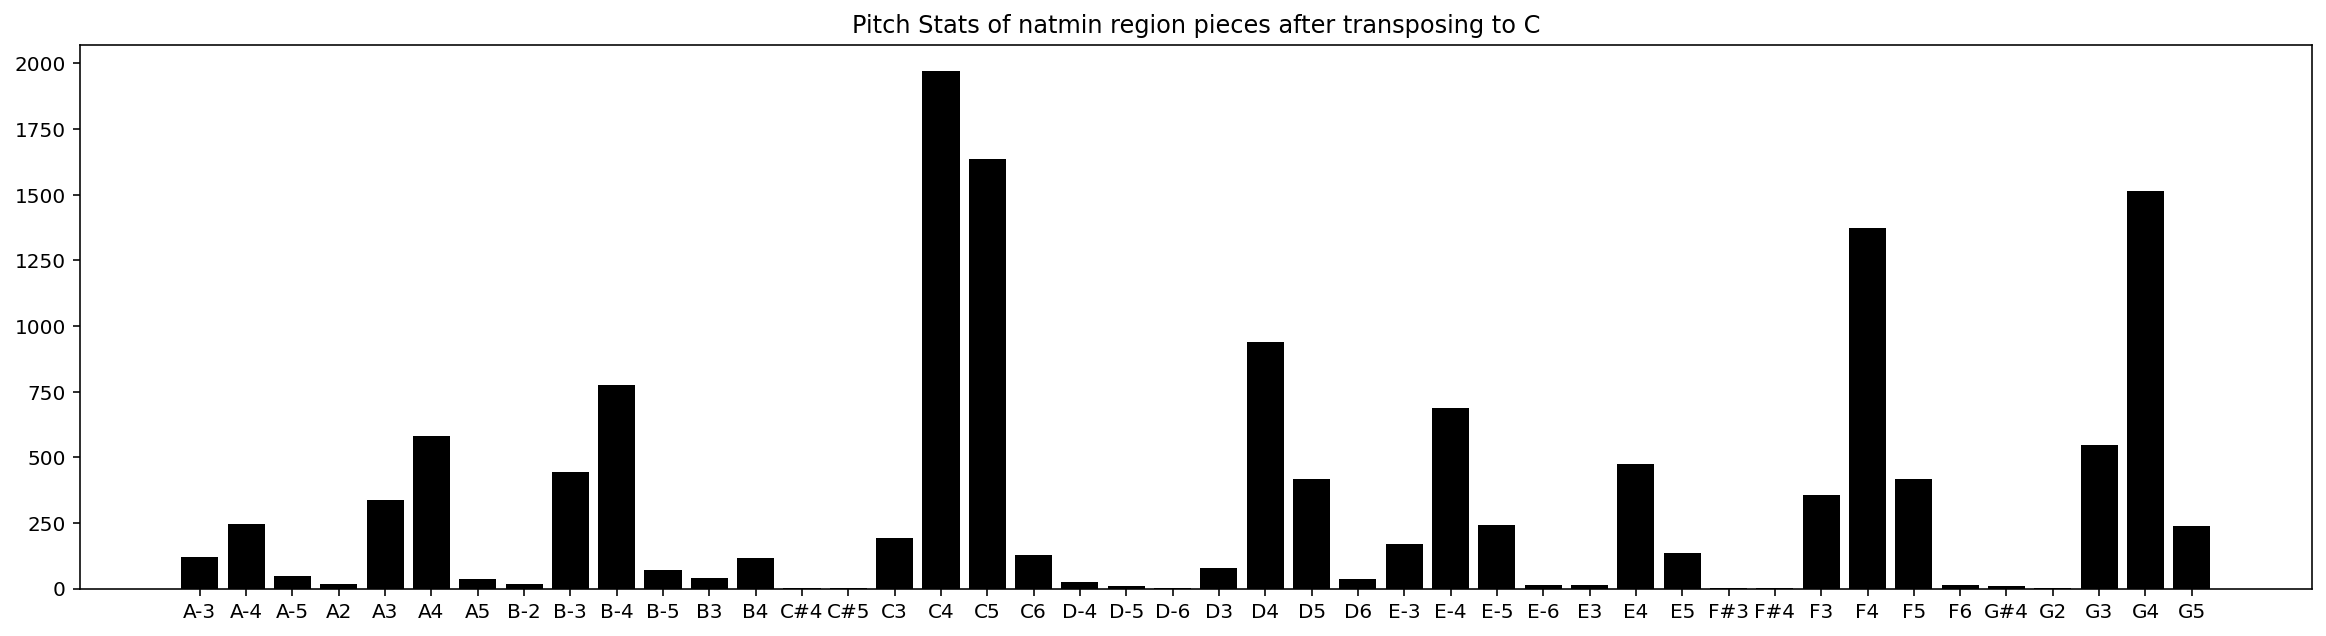

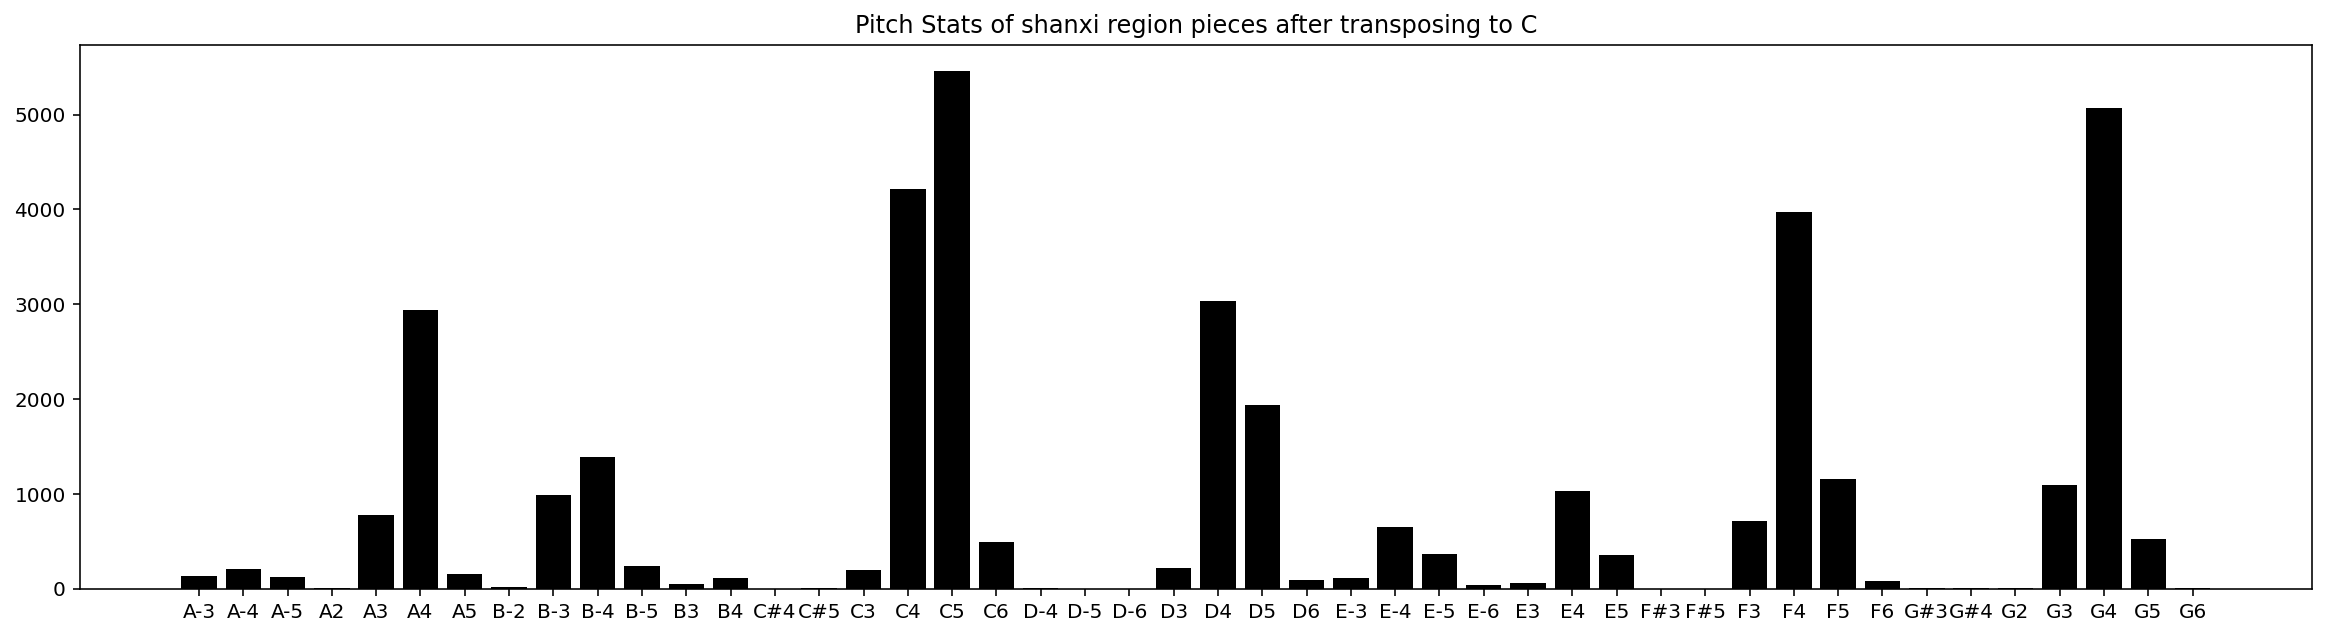

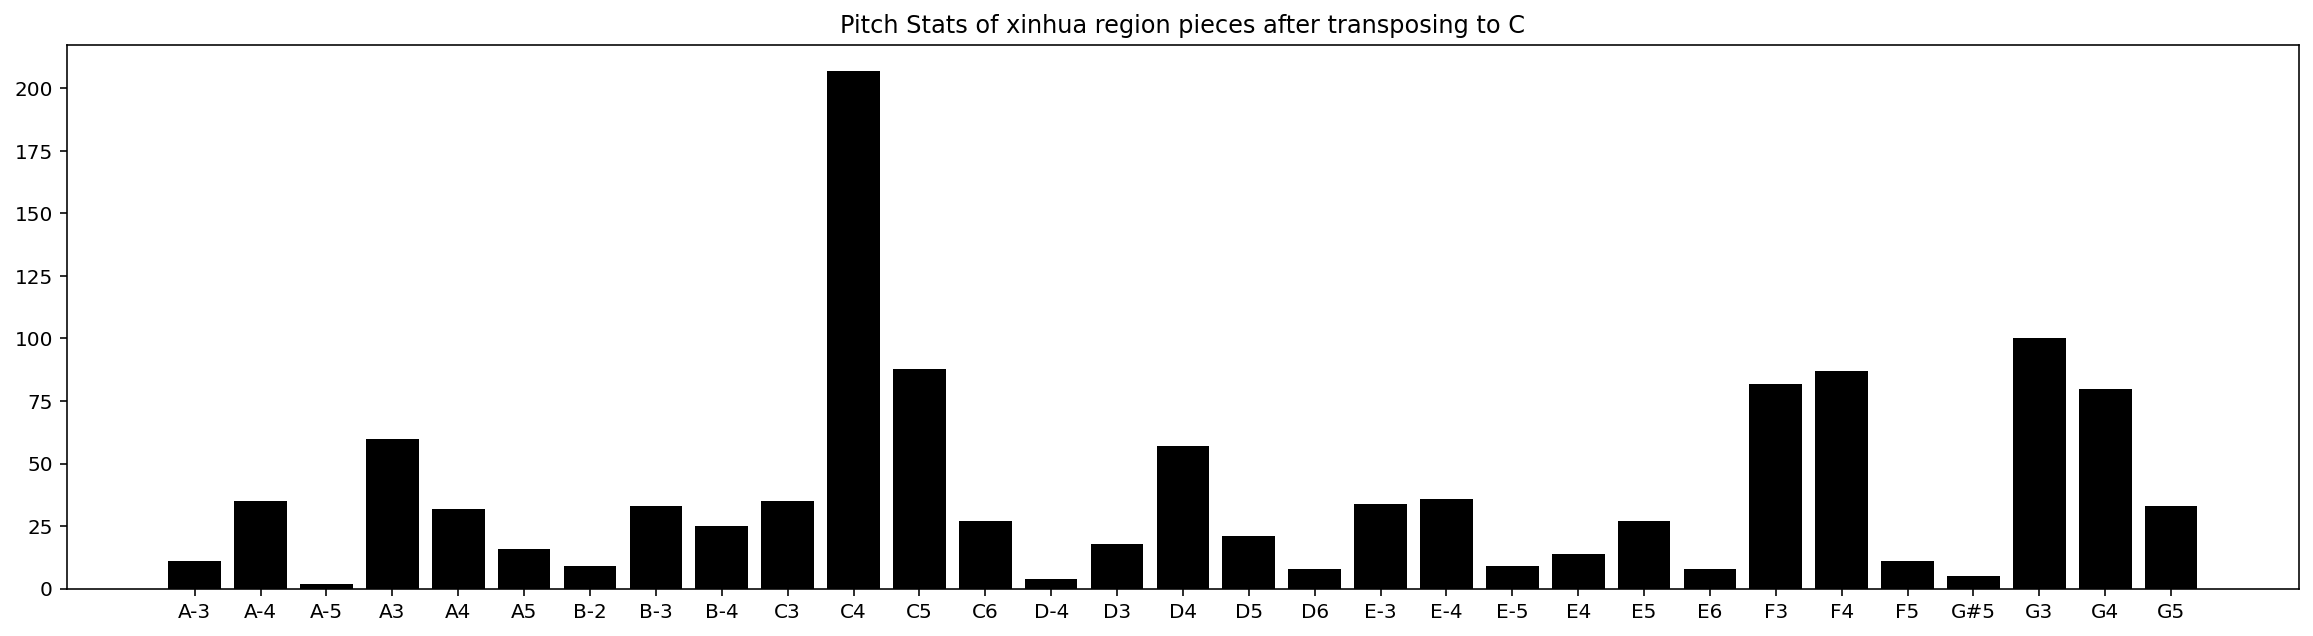

In [15]:
region_pitch_transposed_counts = {}
for gloc in region_pitch_transposed_stat:
    region_pitch_transposed_counts[gloc] = sorted(Counter(region_pitch_transposed_stat[gloc]).items(), key=lambda pair: pair[0])
    x, y = zip(*region_pitch_transposed_counts[gloc])
    plt.bar(x, y, color='black')
    plt.title("Pitch Stats of {} region pieces after transposing to C".format(gloc))
    plt.show()

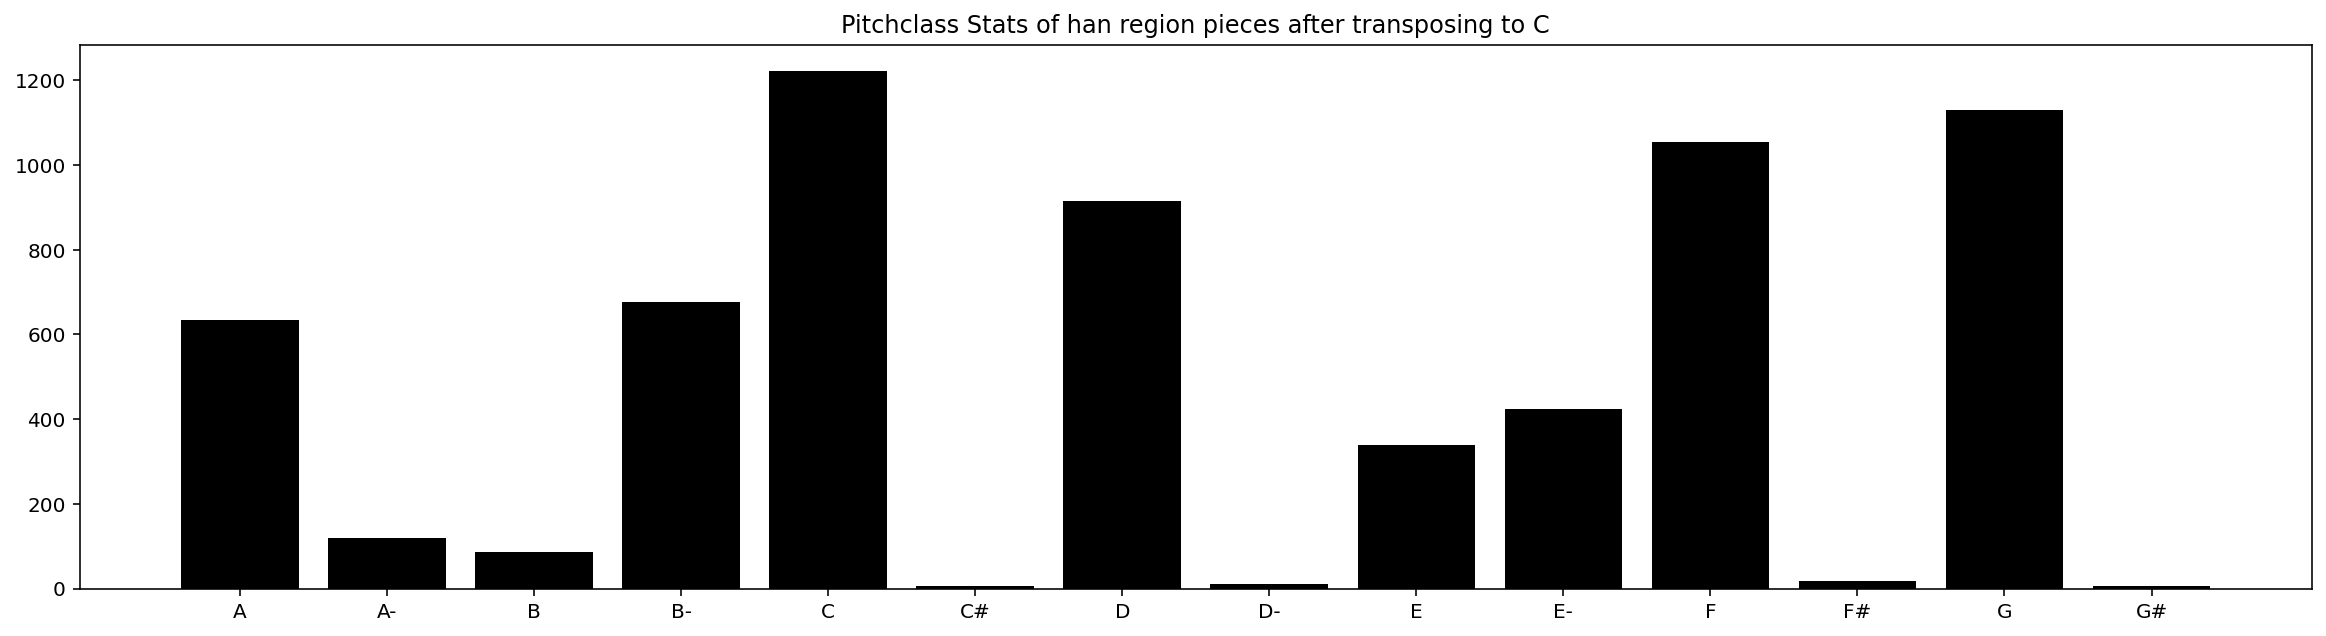

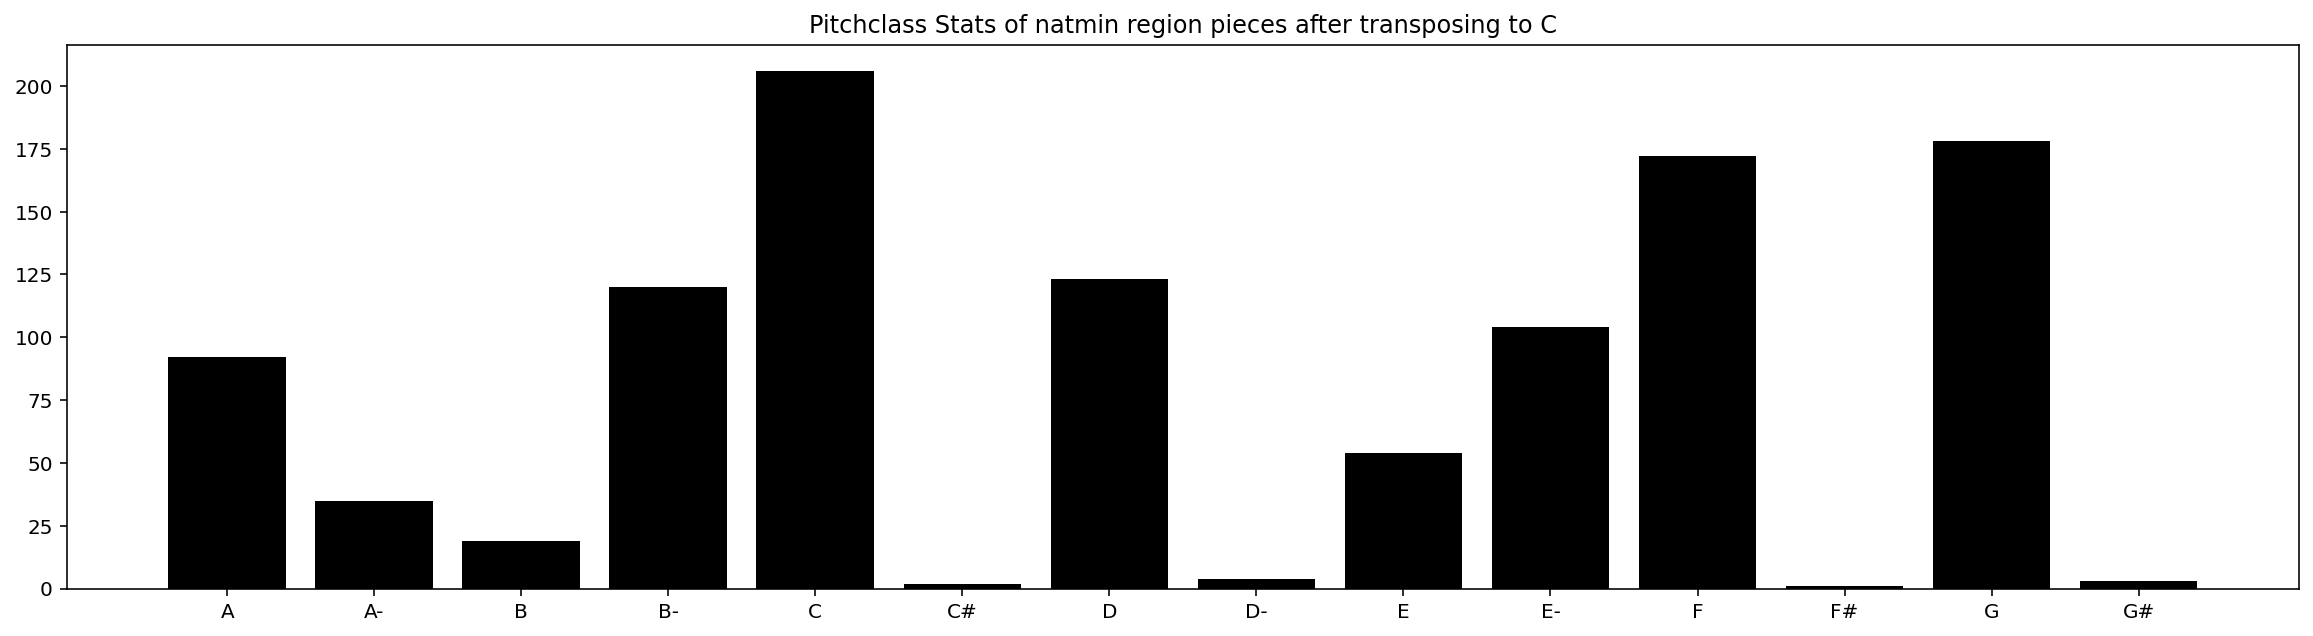

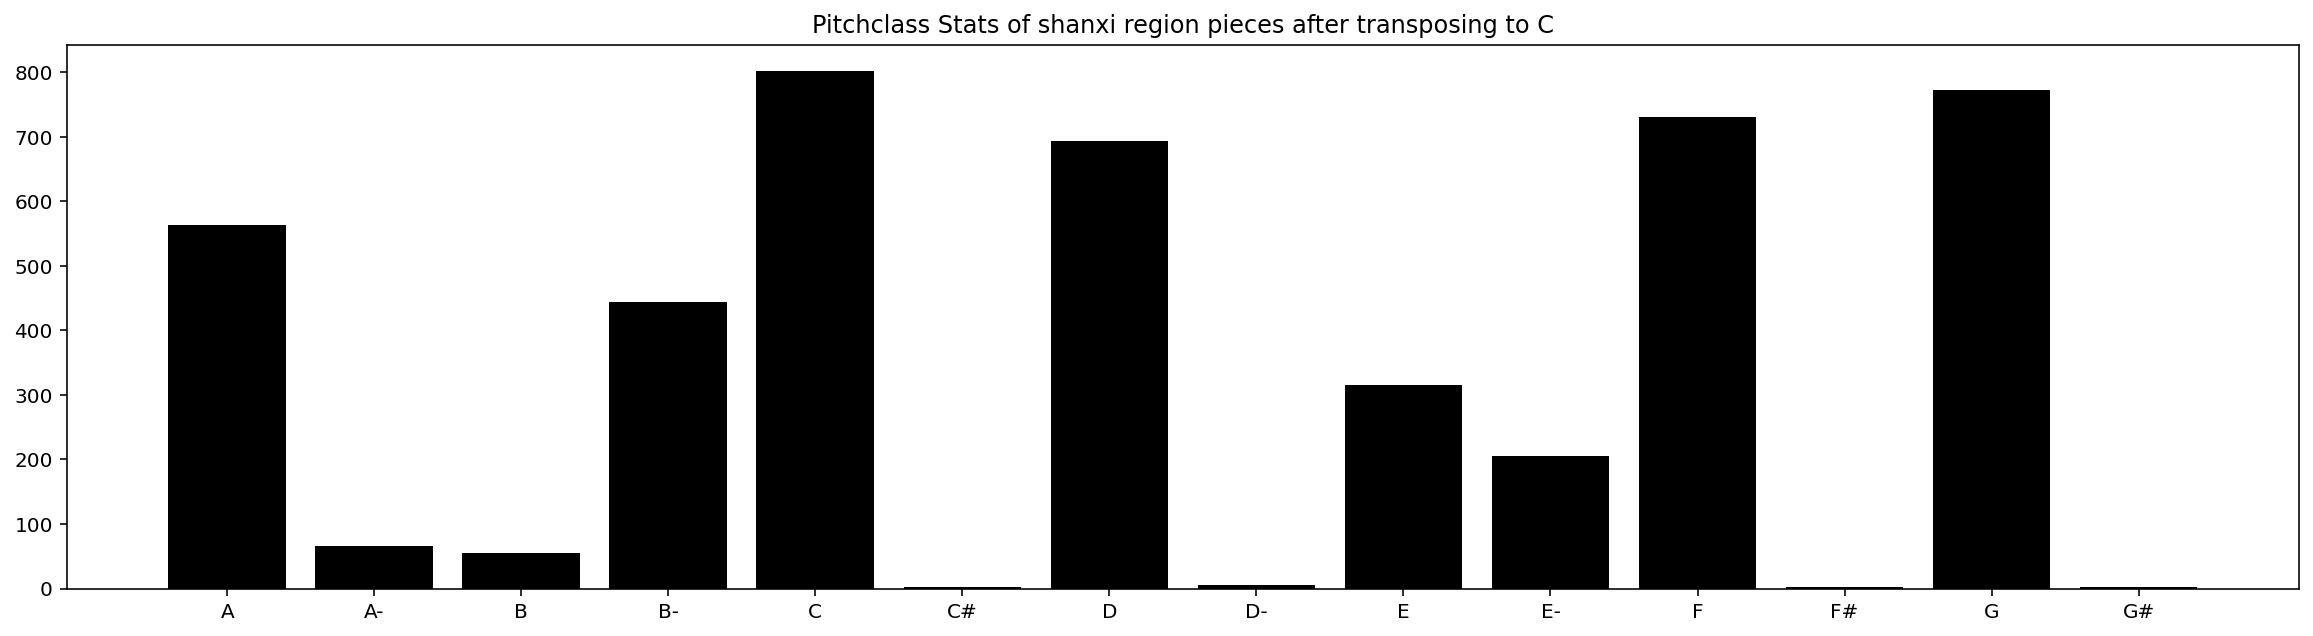

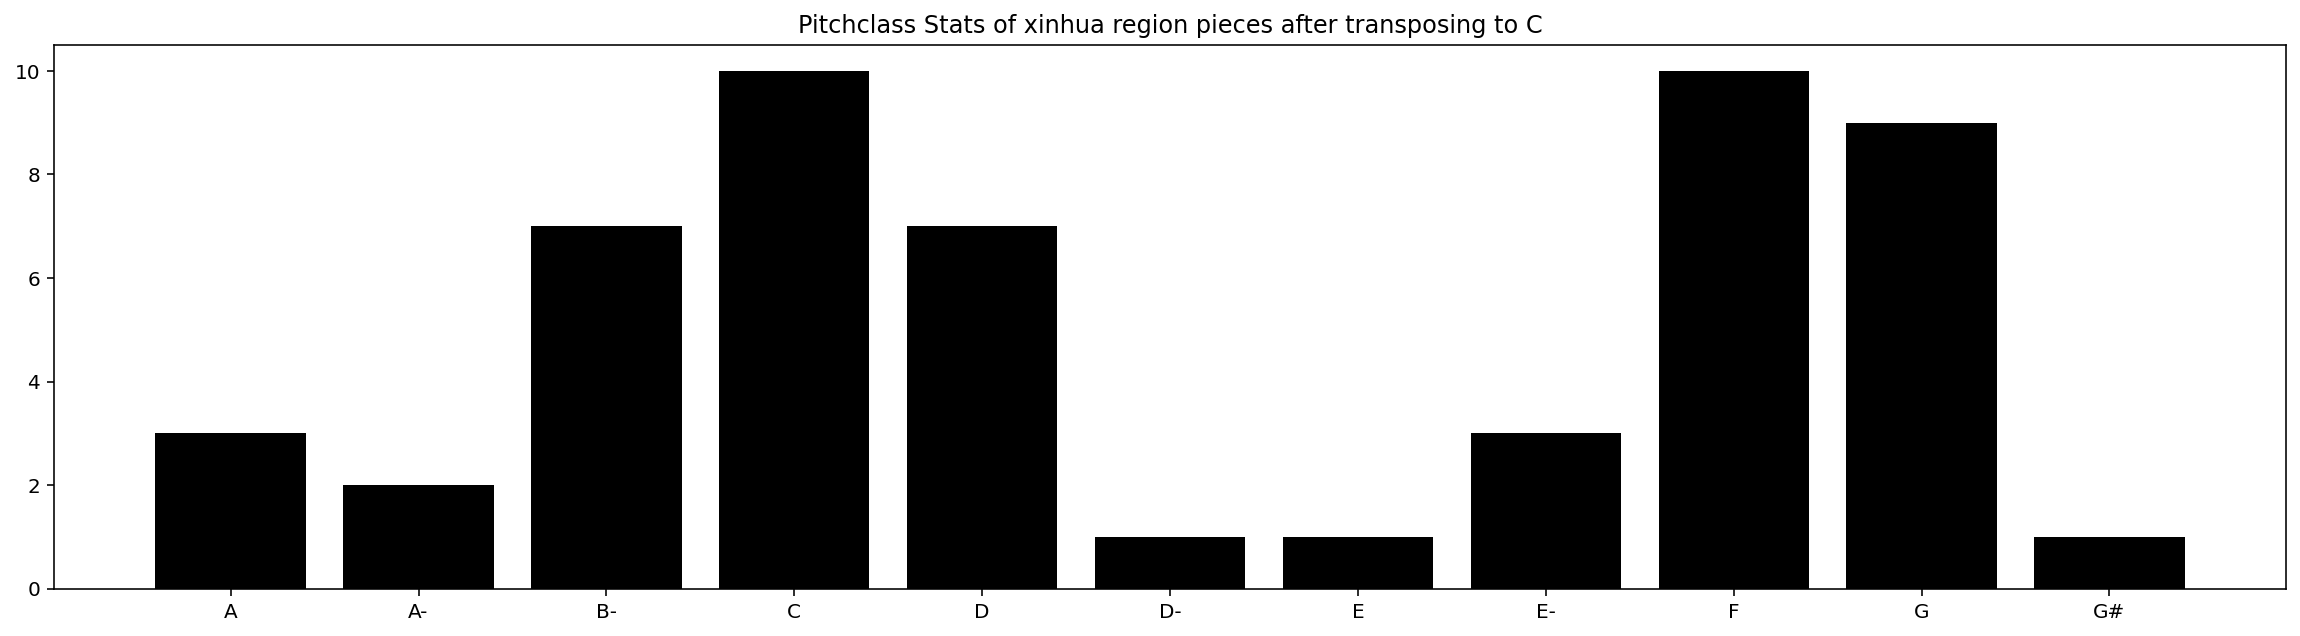

In [16]:
region_pitchclass_transposed_counts = {}
for gloc in region_pitchclass_transposed_stat:
    region_pitchclass_transposed_counts[gloc] = sorted(Counter(region_pitchclass_transposed_stat[gloc]).items(), key=lambda pair: pair[0])
    x, y = zip(*region_pitchclass_transposed_counts[gloc])
    plt.bar(x, y, color='black')
    plt.title("Pitchclass Stats of {} region pieces after transposing to C".format(gloc))
    plt.show()